References:
https://github.com/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/master/09.Unsupervised_learning.ipynb

In [14]:
from sklearn.mixture import GaussianMixture

In [2]:
import pandas as pd

In [15]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [17]:
X = pd.read_csv("data/dataset0.csv", header = None)# Let set dataset0.csv as an example

In [13]:
X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=5, cluster_std=[0.5, 0.5, 0.5, 1, 1])

<Figure size 576x576 with 0 Axes>

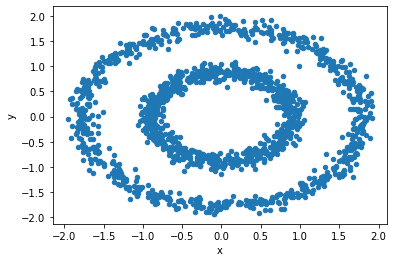

In [156]:
plt.figure(figsize=(8, 8))
X.plot.scatter(x=1, y=2)
plt.xlabel('x')
plt.ylabel('y')
mkft1 = plt.show()

In [134]:
gm = GaussianMixture(n_components=2, n_init=10)

In [135]:
X1 = X.drop(axis = 1, columns = 0 )
X1 = X1.drop(axis = 1, columns = 3)

In [136]:
X1 

,1,2
0,-1.211679,-1.246886
1,1.663585,0.343009
2,0.979093,-0.009582
3,1.558895,0.670995
4,0.777461,-0.525246
...,...,...
1495,0.844952,0.062221
1496,0.725940,0.490716
1497,-0.617111,-0.638345
1498,0.030292,-1.686947


In [137]:
gm.fit(X1)

GaussianMixture(n_components=2, n_init=10)

In [138]:
gm.weights_

array([0.50998844, 0.49001156])

In [139]:
gm.covariances_

array([[[ 0.58550147, -0.31392368],
        [-0.31392368,  0.77450415]],

       [[ 0.56100483, -0.3118438 ],
        [-0.3118438 ,  0.75852869]]])

In [140]:
gm.n_iter_

4

In [141]:
gm.predict(X1)[:15]

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1])

In [142]:
np.round(gm.predict_proba(X1)[:15], 5)

array([[9.9980e-01, 2.0000e-04],
       [9.3000e-04, 9.9907e-01],
       [2.8680e-02, 9.7132e-01],
       [5.6000e-04, 9.9944e-01],
       [2.0804e-01, 7.9196e-01],
       [9.9097e-01, 9.0300e-03],
       [3.2100e-03, 9.9679e-01],
       [3.2500e-03, 9.9675e-01],
       [6.3520e-01, 3.6480e-01],
       [1.9993e-01, 8.0007e-01],
       [7.8051e-01, 2.1949e-01],
       [9.7544e-01, 2.4560e-02],
       [8.9198e-01, 1.0802e-01],
       [2.1080e-02, 9.7892e-01],
       [4.3200e-03, 9.9568e-01]])

In [143]:
import numpy as np

In [144]:
X_new, y_new = gm.sample(6)

In [145]:
X_new

array([[ 0.92594429, -0.84285092],
       [ 0.72395862, -0.41911692],
       [-0.35239824,  0.17030927],
       [ 0.3033399 ,  1.13383696],
       [ 0.39608527,  0.49660899],
       [ 1.42773804,  0.13393916]])

In [146]:
y_new

array([0, 1, 1, 1, 1, 1])

In [147]:
gm.score_samples(X1)[:10]

array([-3.23384092, -3.01973248, -2.14458665, -3.09248814, -2.55329313,
       -2.07088242, -2.89352076, -3.02938318, -3.75802603, -2.50305748])

In [148]:
# Plotting decision regions
x_min, x_max = X1[1].min() - 1, X1[1].max() + 1
y_min, y_max = X1[2].min() - 1, X1[2].max() + 1

xx, yy= np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1)
                     )

In [149]:
Z = np.exp(gm.score_samples(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

In [150]:
Z

array([[1.73714180e-08, 3.54037286e-08, 7.05969158e-08, ...,
        5.02733462e-05, 4.11359653e-05, 3.34127064e-05],
       [3.17209275e-08, 6.40793900e-08, 1.26652525e-07, ...,
        7.08511767e-05, 5.81447038e-05, 4.72219656e-05],
       [5.69760262e-08, 1.14083650e-07, 2.23500064e-07, ...,
        9.91332049e-05, 8.13982758e-05, 6.59695928e-05],
       ...,
       [5.25514095e-05, 6.53406806e-05, 7.98627398e-05, ...,
        2.48335763e-07, 1.25241362e-07, 6.17194122e-08],
       [3.77246967e-05, 4.66395495e-05, 5.67610767e-05, ...,
        1.38319882e-07, 6.90983643e-08, 3.37300055e-08],
       [2.66943304e-05, 3.28462867e-05, 3.98551483e-05, ...,
        7.57370635e-08, 3.74771248e-08, 1.81213085e-08]])

In [122]:
from mpl_toolkits import mplot3d

In [152]:
xx

array([[-2.95656785, -2.85656785, -2.75656785, ...,  2.64343215,
         2.74343215,  2.84343215],
       [-2.95656785, -2.85656785, -2.75656785, ...,  2.64343215,
         2.74343215,  2.84343215],
       [-2.95656785, -2.85656785, -2.75656785, ...,  2.64343215,
         2.74343215,  2.84343215],
       ...,
       [-2.95656785, -2.85656785, -2.75656785, ...,  2.64343215,
         2.74343215,  2.84343215],
       [-2.95656785, -2.85656785, -2.75656785, ...,  2.64343215,
         2.74343215,  2.84343215],
       [-2.95656785, -2.85656785, -2.75656785, ...,  2.64343215,
         2.74343215,  2.84343215]])

In [95]:
yy

array([[-2.93168538, -2.93168538, -2.93168538, ..., -2.93168538,
        -2.93168538, -2.93168538],
       [-2.83168538, -2.83168538, -2.83168538, ..., -2.83168538,
        -2.83168538, -2.83168538],
       [-2.73168538, -2.73168538, -2.73168538, ..., -2.73168538,
        -2.73168538, -2.73168538],
       ...,
       [ 2.76831462,  2.76831462,  2.76831462, ...,  2.76831462,
         2.76831462,  2.76831462],
       [ 2.86831462,  2.86831462,  2.86831462, ...,  2.86831462,
         2.86831462,  2.86831462],
       [ 2.96831462,  2.96831462,  2.96831462, ...,  2.96831462,
         2.96831462,  2.96831462]])

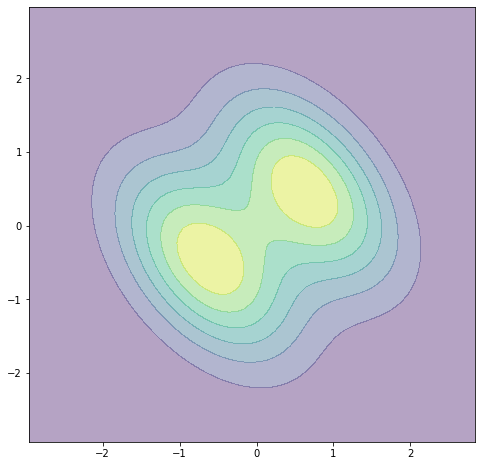

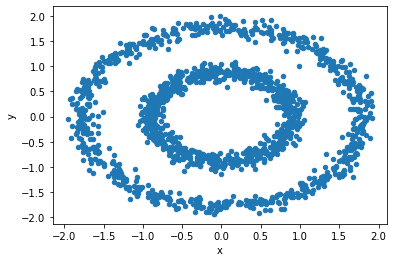

In [162]:

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
X.plot.scatter(x=1, y=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The images above are our results. The upper image is the clusters' structure, and the lower image is original data.